**Econ 353: Money, Banking and Financial Institutions**  

**Project 1 on Time-Series Analysis**  

We are using the daily closing prices of NASDAQ Composite Index

Data source: https://www.nasdaq.com/market-activity/index/comp/historical?page=1&rows_per_page=10&timeline=y1



**<span style="color:red;">Objective of the Project:</span>**  

1) Upload a Time-series data set  
2) Visualize the data and report what you find - is there a trend or sesaonal component to it  
3) Check the stationarity of the data and report results  
4) If the data has trend and /or seasonality, decompose the data into trend and/or seasonal component 
5) Visualize the components of the data
6) If the data has trend then de-trend the data
7) If the data has seasonal component then de-seasonalize the data
8) Visualize the de-seasonalized /de-trended data
9) Check stationarity of de-trended data and report results. Make sure the series the stationary before further analysis
10) Forecast using ARIMA modelling
11) Visualize the Forecast

The Notebook below is divided into 11 sections above each section how to complete each analysis, respectively. 

**<span style="color:red;">install necessary libraries if not installed</span>**  

In [208]:
#pip install pmdarima

You need to import certain libraries in python whioch you will require for plotting

In [209]:
# Import necessary libraries
import pandas as pd #Pandas is a popular data manipulation and analysis library for the Python programming language. It provides data structures for efficiently storing, analysing and manipulating large datasets
import numpy as np #NumPy is a fundamental library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays
import matplotlib.pyplot as plt # This library is used for plotting
from statsmodels.tsa.stattools import adfuller # this is for ststitical tests like carrying out unit root test, among others
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima # this is for ARIMA forecasting
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [210]:
# Load your time series data (replace 'your_data.csv' with your actual file or data source)
df = pd.read_csv('Nasdaq_closing_prices.csv')

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

# Convert 'Value' to numeric format
#df['Prices'] = df['Prices'].str.replace(',', '').astype(int)

# Set 'Date' as the index
df.set_index('Date', inplace=True)

In [211]:
print(df)

              Prices
Date                
2023-02-09  11789.58
2023-02-10  11718.12
2023-02-13  11891.79
2023-02-14  11960.15
2023-02-15  12070.59
...              ...
2024-02-02  15628.95
2024-02-05  15597.68
2024-02-06  15609.00
2024-02-07  15756.64
2024-02-08  15793.71

[251 rows x 1 columns]


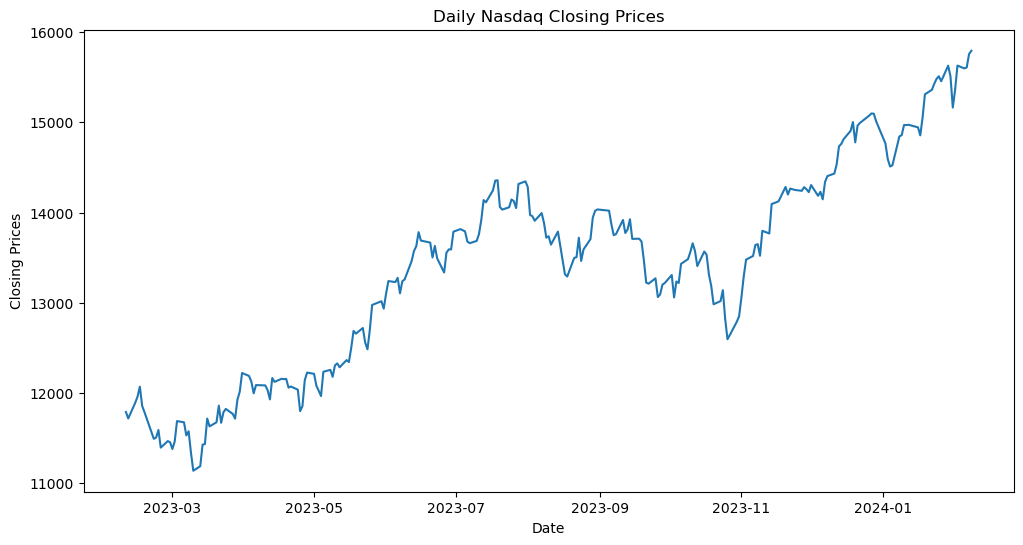

In [212]:
# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices'])
plt.title('Daily Nasdaq Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.show()

The Augmented Dickey-Fuller (ADF) test is a statistical test for stationarity. The test produces an ADF statistic and a p-value. The null hypothesis of the test is that the time series has a unit root, which indicates non-stationarity. The alternative hypothesis is that the time series is stationary.

In [213]:
# Check for stationarity
def stationarity_test(timeseries):
    result = adfuller(df, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    
stationarity_test(df['Prices'])

ADF Statistic: -0.2802800763803356
p-value: 0.9282512001838636
Critical Values: {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}


Interpretation:

ADF Statistic: The ADF statistic is -0.2802. The more negative this statistic, the stronger the evidence against the null hypothesis. In this case, it's less negative than the critical values.

p-value: The p-value is 0.928. If the p-value is greater than a chosen significance level (e.g., 0.05), you fail to reject the null hypothesis. In this case, the p-value is greater than 0.05, suggesting that we do not have enough evidence to reject the null hypothesis.

Critical Values: These are the critical values at 1%, 5%, and 10% significance levels. The ADF statistic should be more negative than these critical values for us to reject the null hypothesis. In this case, the ADF statistic is not more negative than the critical values.
    
Conclusion:

Based on the ADF test results, we do not have enough evidence to reject the null hypothesis of non-stationarity. The time series data may not be stationary, and further steps such as differencing or other transformations may be needed to achieve stationarity.   

The seasonal_decompose function in statsmodels allows you to decompose a time series into its trend, seasonal, and residual components. The period parameter represents the number of observations per seasonal cycle.

In my case, since the data appears to be monthly, we can set the period parameter to 12 because there are 12 months in a year. If our data has a different frequency, adjust the period accordingly.

In [214]:
# De-compose for trend, seasonality, and residual
decomposition = seasonal_decompose(df['Prices'], model='additive', period=12)#adjust seasonal period as required
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

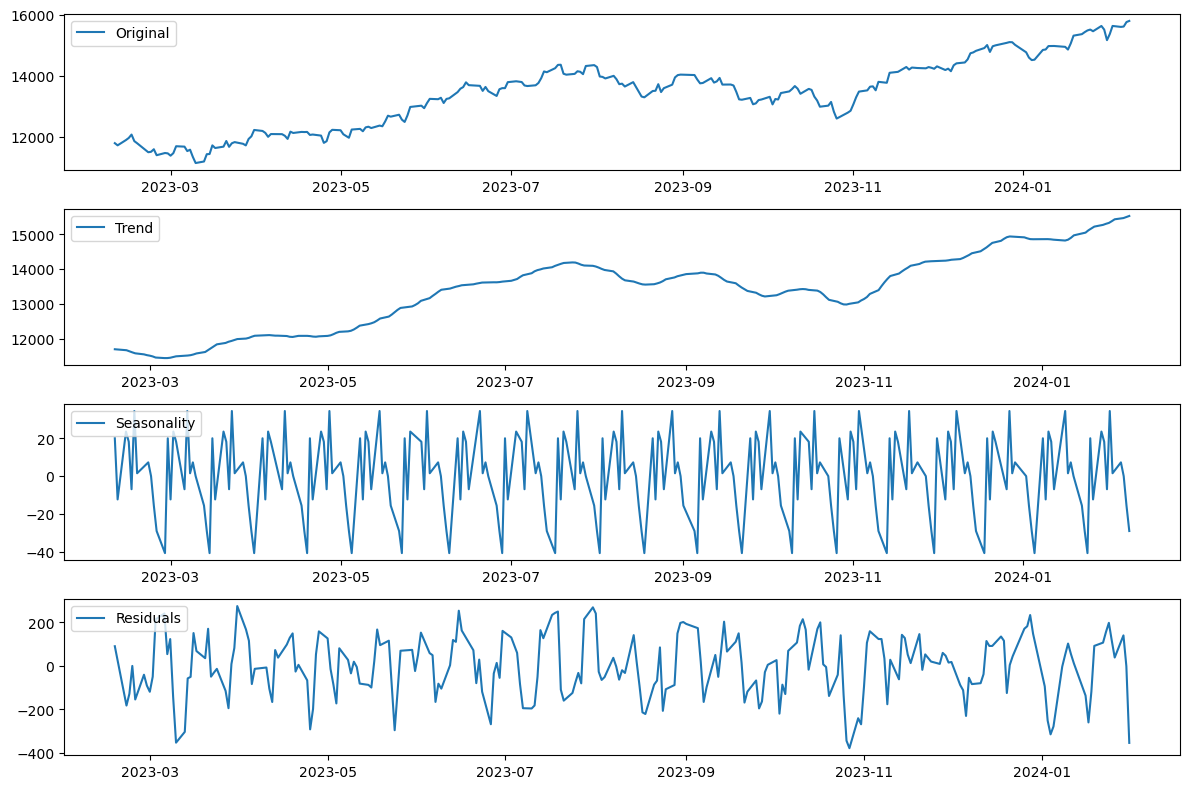

In [215]:
# Visualize components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Prices'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



In [216]:
# De-trend by subtracting trend
detrended = df['Prices'] - trend



In [217]:
# De-seasonalize by subtracting seasonal component
deseasonalized = df['Prices'] - seasonal



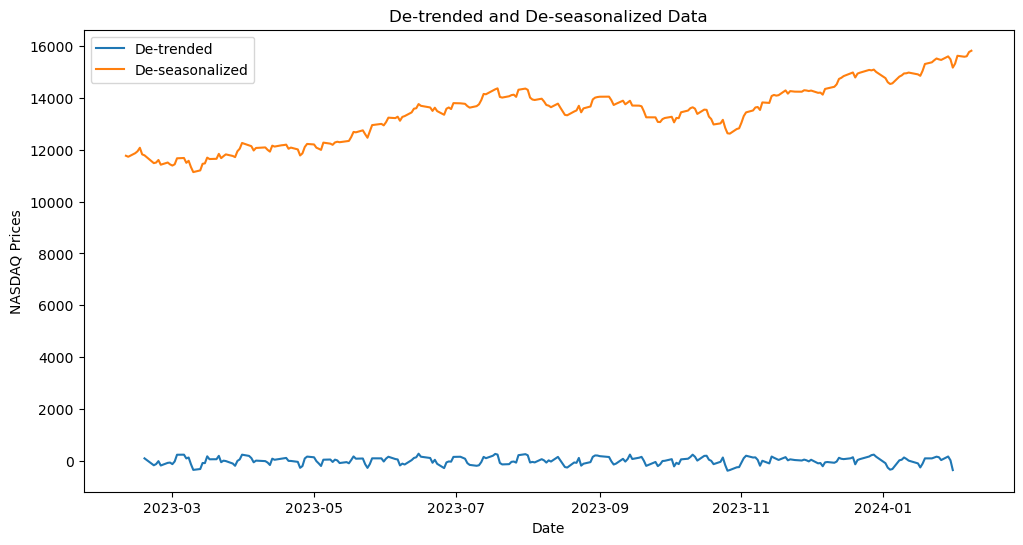

In [219]:
# Visualize de-trended and de-seasonalized data
plt.figure(figsize=(12, 6))
plt.plot(detrended, label='De-trended')
plt.plot(deseasonalized, label='De-seasonalized')
plt.legend(loc='upper left')
plt.title('De-trended and De-seasonalized Data')
plt.xlabel('Date')
plt.ylabel('NASDAQ Prices')
plt.show()



In [220]:
# Check stationarity of de-trended data
stationarity_test(deseasonalized.dropna())



ADF Statistic: -0.2802800763803356
p-value: 0.9282512001838636
Critical Values: {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}


In [221]:
# Check stationarity of de-trended data
stationarity_test(detrended.dropna())


ADF Statistic: -0.2802800763803356
p-value: 0.9282512001838636
Critical Values: {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}


Based on the ADF test results, we do not have enough evidence to reject the null hypothesis of non-stationarity. The time series data may not be stationary, and further steps such as differencing or other transformations may be needed to achieve stationarity.   

In the provided code below, the auto_arima function from the pmdarima library is used to automatically find the best ARIMA model (p, d, q) for your time series data. This function performs a grid search over multiple combinations of p, d, and q values and selects the model with the lowest Akaike Information Criterion (AIC).

Log Transformation:

Apply a logarithmic transformation to stabilize variance 

In [222]:
df['Prices_log'] = np.log(df['Prices'])


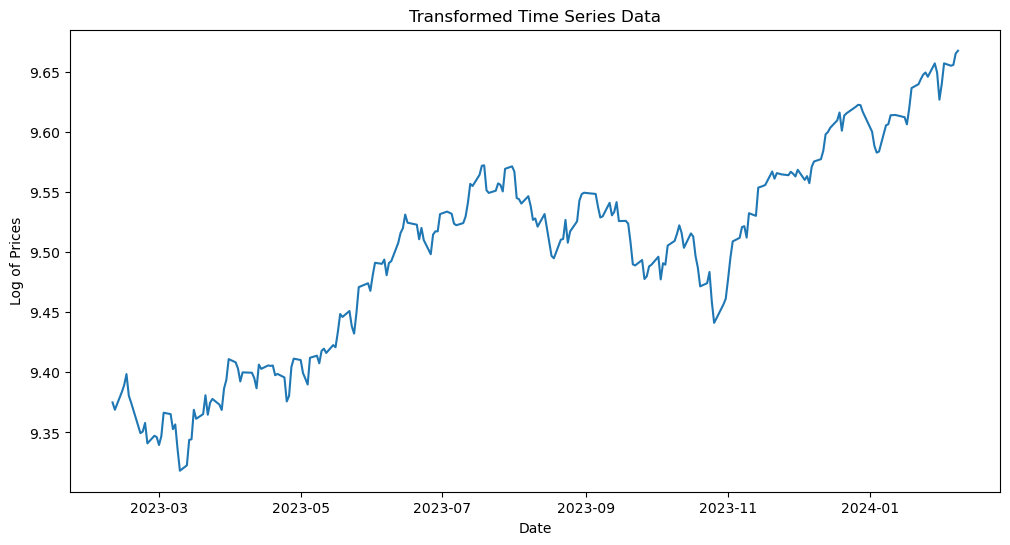

In [196]:
# Visualize the logged time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices_log'])
plt.title('Transformed Time Series Data')
plt.xlabel('Date')
plt.ylabel('Log of Prices')
plt.show()

In [237]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity
def stationarity_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# Assuming 'Prices_log' is the correct column name
prices_log_series = df['Prices_log'].dropna().values
stationarity_test(prices_log_series)




ADF Statistic: -0.47392604663957305
p-value: 0.8970050076915885
Critical Values: {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}


The Augmented Dickey-Fuller (ADF) test results suggest that the time series is non-stationary. The p-value is greater than the significance level of 0.05, indicating that we fail to reject the null hypothesis of non-stationarity.

Since the time series is non-stationary, you may need to apply differencing or other transformations to make it stationary. Once stationarity is achieved, you can proceed with building your time series model.

First-differencing data

In [238]:
df['Prices_log_diff'] = df['Prices_log'].diff()

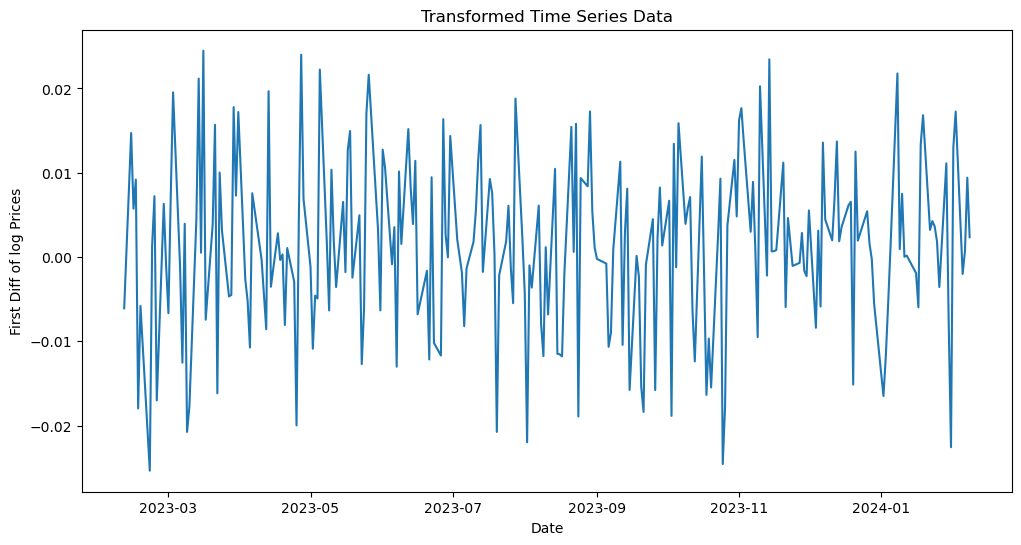

In [239]:
# Visualize the logged time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices_log_diff'])
plt.title('Transformed Time Series Data')
plt.xlabel('Date')
plt.ylabel('First Diff of log Prices')
plt.show()

In [240]:
# Check stationarity of differenced data
stationarity_test(df['Prices_log_diff'].dropna())


ADF Statistic: -15.114476133828196
p-value: 7.613626483984345e-28
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}


The updated ADF test results are as follows:

ADF Statistic: -15.114476133828196
p-value: 7.613626483984345e-28
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}
Interpretation:

ADF Statistic: The ADF Statistic is significantly more negative than the critical values. This suggests strong evidence against the null hypothesis of non-stationarity.

p-value: The p-value is extremely small (7.613626483984345e-28), well below the commonly used significance level of 0.05. This provides strong evidence to reject the null hypothesis.

Critical Values: The ADF Statistic is more negative than all the critical values at 1%, 5%, and 10% significance levels.

Conclusion:

Based on the ADF test results, you have enough evidence to reject the null hypothesis of non-stationarity. The differenced series (df['Value_diff']) appears to be stationary. You can proceed with modeling or forecasting based on this stationary series.

In [241]:
df['Prices_log_diff']

Date
2023-02-09         NaN
2023-02-10   -0.006080
2023-02-13    0.014712
2023-02-14    0.005732
2023-02-15    0.009192
                ...   
2024-02-02    0.017251
2024-02-05   -0.002003
2024-02-06    0.000725
2024-02-07    0.009414
2024-02-08    0.002350
Name: Prices_log_diff, Length: 251, dtype: float64

In [242]:
#You can check if a time series has NaN values using the isna() or isnull() method in Pandas. Here's an example:


has_nan = df['Prices_log_diff'].isna().any()

if has_nan:
    print("The 'Prices_log_diff' series has NaN values.")
else:
    print("The 'Prices_log_diff' series does not have NaN values.")


The 'Prices_log_diff' series has NaN values.


In [243]:
import pandas as pd
from pmdarima import auto_arima


# Fill NaN values with the mean of the column
df['Prices_log_diff'].fillna(df['Prices_log_diff'].mean(), inplace=True)



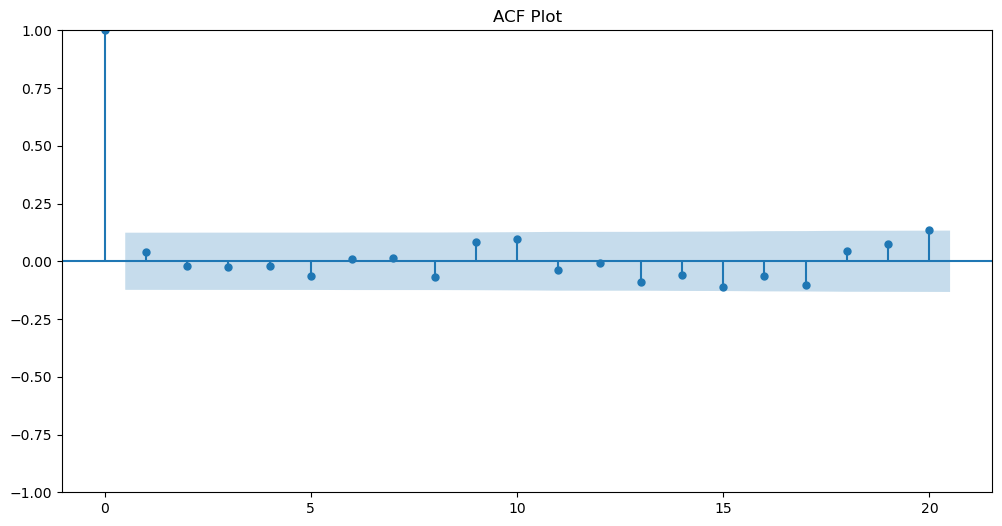

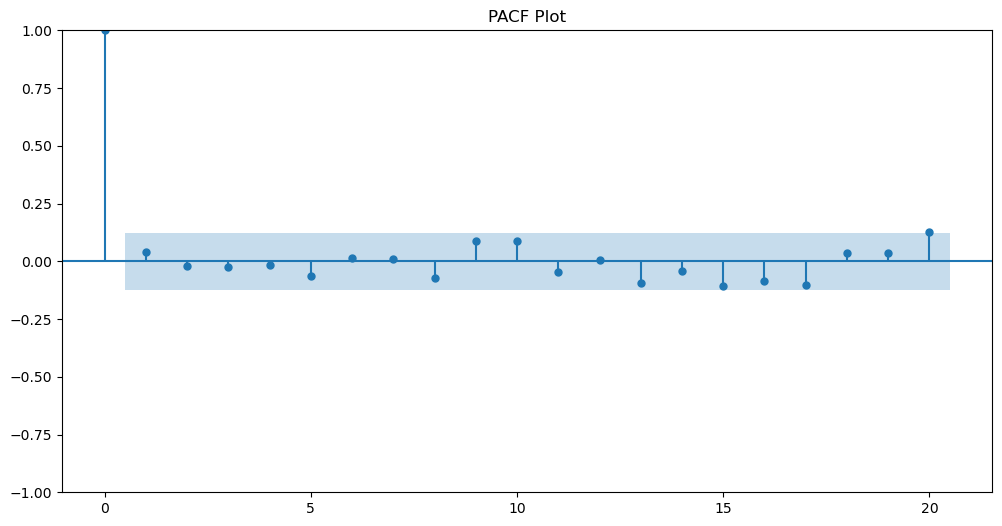

In [244]:
# ACF and PACF plots for determining ARIMA orders
plt.figure(figsize=(12, 6))
plot_acf(df['Prices_log_diff'], lags=20, ax=plt.gca())
plt.title('ACF Plot')
plt.show()
plt.figure(figsize=(12, 6))
plot_pacf(df['Prices_log_diff'], lags=20, ax=plt.gca())
plt.title('PACF Plot')
plt.show()

Fitting arima model (Method 1)

In [245]:
from pmdarima import auto_arima
import pandas as pd

# Assuming df is your time series dataframe with a datetime index and 'Prices' column
# Adjust the exogenous variables accordingly if needed

# Perform a grid search for the best SARIMAX model
model = auto_arima(df['Prices_log_diff'], exogenous=None, seasonal=True, m=12, suppress_warnings=True, stepwise=True)

# Display the best model's parameters
print(model.order)
#print(model.seasonal_order)

# Fit the best model to the data
model.fit(df['Prices_log_diff'])


(0, 0, 0)


ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  251
Model:                        SARIMAX   Log Likelihood                 793.805
Date:                Wed, 14 Feb 2024   AIC                          -1583.610
Time:                        23:50:26   BIC                          -1576.559
Sample:                             0   HQIC                         -1580.773
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0012      0.001      1.799      0.072      -0.000       0.002
sigma2         0.0001   9.95e-06     10.535      0.000    8.53e-05       0.000
Ljung-Box (L1) (Q):                   0.41   Jarque-

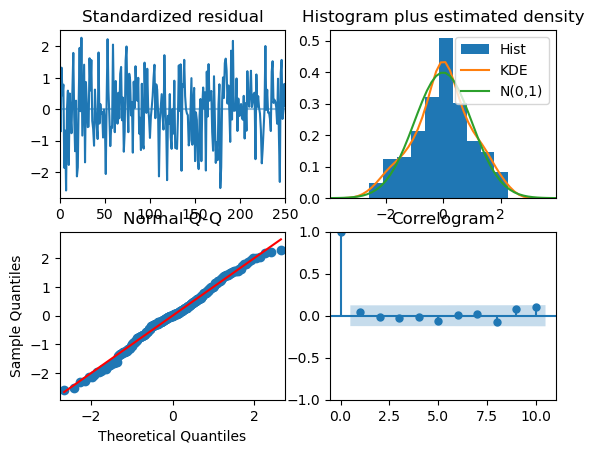

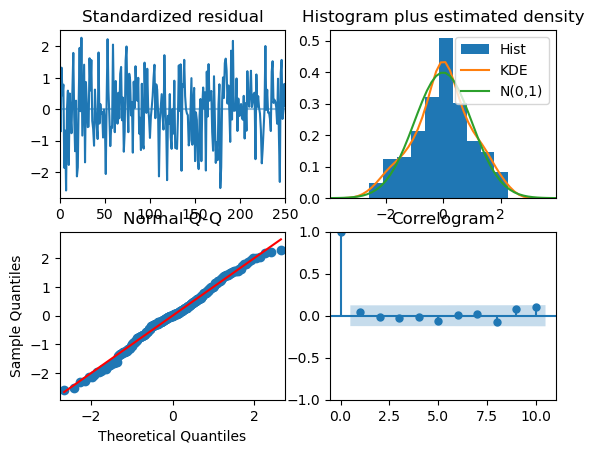

In [249]:
print(model.summary())
model.plot_diagnostics()

Let's break down the key components of the result:

Intercept (intercept):

Coefficient: 0.0012

P-value: 0.072
95% Confidence Interval: (lower bound: -0.000, upper bound: 0.002)
The intercept represents the estimated constant term in the model. In this case, the coefficient is 0.0012, and the associated p-value is 0.072. The p-value is used to test the null hypothesis that the intercept is equal to zero. A p-value less than the significance level (commonly 0.05) would suggest that the intercept is statistically significant.

Sigma-squared (sigma2):

Coefficient: 0.0001
P-value: 0.000

Sigma-squared (σ²) is associated with the variance or volatility of the error term in a time series model. In this context, it is the estimated variance of the residuals. The coefficient of 0.0001 suggests the estimated value of sigma-squared.

A very low p-value (0.000) indicate that the coefficient is likely significant.

In summary, the output suggests that the intercept and sigma-squared are estimated in our model. The intercept has a p-value of 0.072, which is slightly above the common significance level of 0.05, indicating a marginally significant result. The sigma-squared coefficient is highly significant with a very low p-value (0.000), suggesting that the estimated variance is statistically different from zero.

In [250]:
# Assuming 'model' is the SARIMAX model fitted using auto_arima

# Out-of-sample forecast
n_periods = 10  # Adjust as needed
out_of_sample_forecast, out_of_sample_conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Display the out-of-sample forecast values
#print("\nOut-of-sample Forecast Values:")
#print(out_of_sample_forecast)

# Display the out-of-sample confidence intervals
#print("\nOut-of-sample Confidence Intervals:")
#print(out_of_sample_conf_int)


/Users/kaushikisingh/anaconda3/envs/Kaushiki/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/kaushikisingh/anaconda3/envs/Kaushiki/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [251]:
import numpy as np

# Reverse differencing and log transformation for combined forecast
combined_forecast_log_diff_reverse = df['Prices_log'].iloc[-1] + np.cumsum(out_of_sample_forecast)
combined_forecast_original = np.exp(combined_forecast_log_diff_reverse)
print(combined_forecast_original)
# Reverse differencing and log transformation for combined confidence interval
lower_bound_diff_reverse = df['Prices_log'].iloc[-1] + np.cumsum(out_of_sample_conf_int[:, 0])
upper_bound_diff_reverse = df['Prices_log'].iloc[-1] + np.cumsum(out_of_sample_conf_int[:, 1])
lower_bound_original = np.exp(lower_bound_diff_reverse)
upper_bound_original = np.exp(upper_bound_diff_reverse)
# Display the confidence intervals in the original scale
print("\nConfidence Intervals in the Original Scale:")
print("Lower Bound:", lower_bound_original)
print("Upper Bound:", upper_bound_original)

251    15812.192856
252    15830.697342
253    15849.223483
254    15867.771305
255    15886.340833
256    15904.932091
257    15923.545107
258    15942.179905
259    15960.836511
260    15979.514949
dtype: float64

Confidence Intervals in the Original Scale:
Lower Bound: [15498.02211074 15207.87005365 14923.15018756 14643.76081166
 14369.60212918 14100.5762117  13836.58696425 13577.54009091
 13323.34306116 13073.90507682]
Upper Bound: [16132.73236625 16479.03207044 16832.76532539 17194.09169717
 17563.17417702 17940.17925489 18325.27699456 18718.64111033
 19120.44904541 19530.88205192]


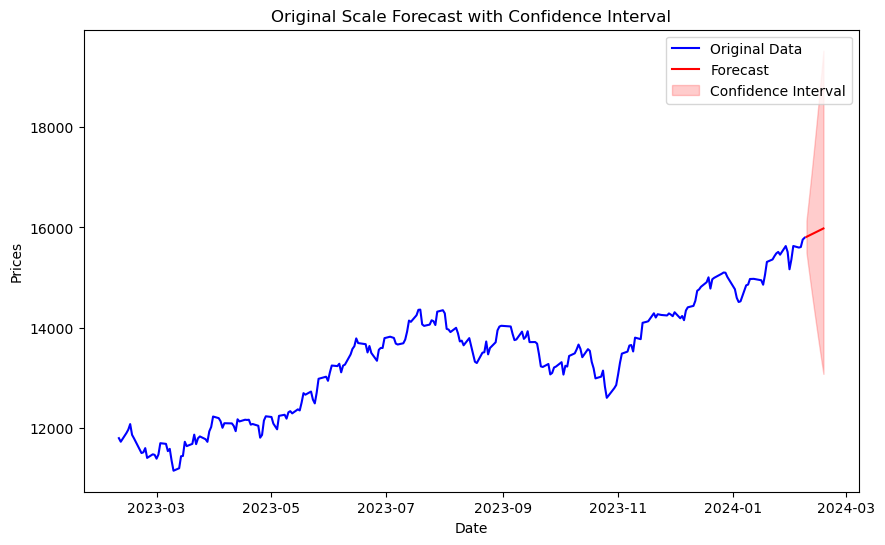

In [252]:
# Plot combined forecast with confidence interval
import matplotlib.pyplot as plt

# Assuming 'forecast_original' contains the forecasted values in the original scale
# Assuming df is your original dataframe
# Assuming 'lower_bound_original' and 'upper_bound_original' are pre-calculated confidence interval bounds

# Create a time index for the forecast
forecast_index = pd.date_range(start=df.index[-1], periods=len(combined_forecast_original) + 1, freq='D')[1:]

# Plot the original scale forecast values with pre-calculated confidence interval bounds
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Prices'], label='Original Data', color='blue')
plt.plot(forecast_index, combined_forecast_original, label='Forecast', color='red')
plt.fill_between(forecast_index, lower_bound_original, upper_bound_original, color='red', alpha=0.2, label='Confidence Interval')
plt.title('Original Scale Forecast with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()
